## Precision Agriculture Crop Recommendation 

### Crop Recommendation Automation 

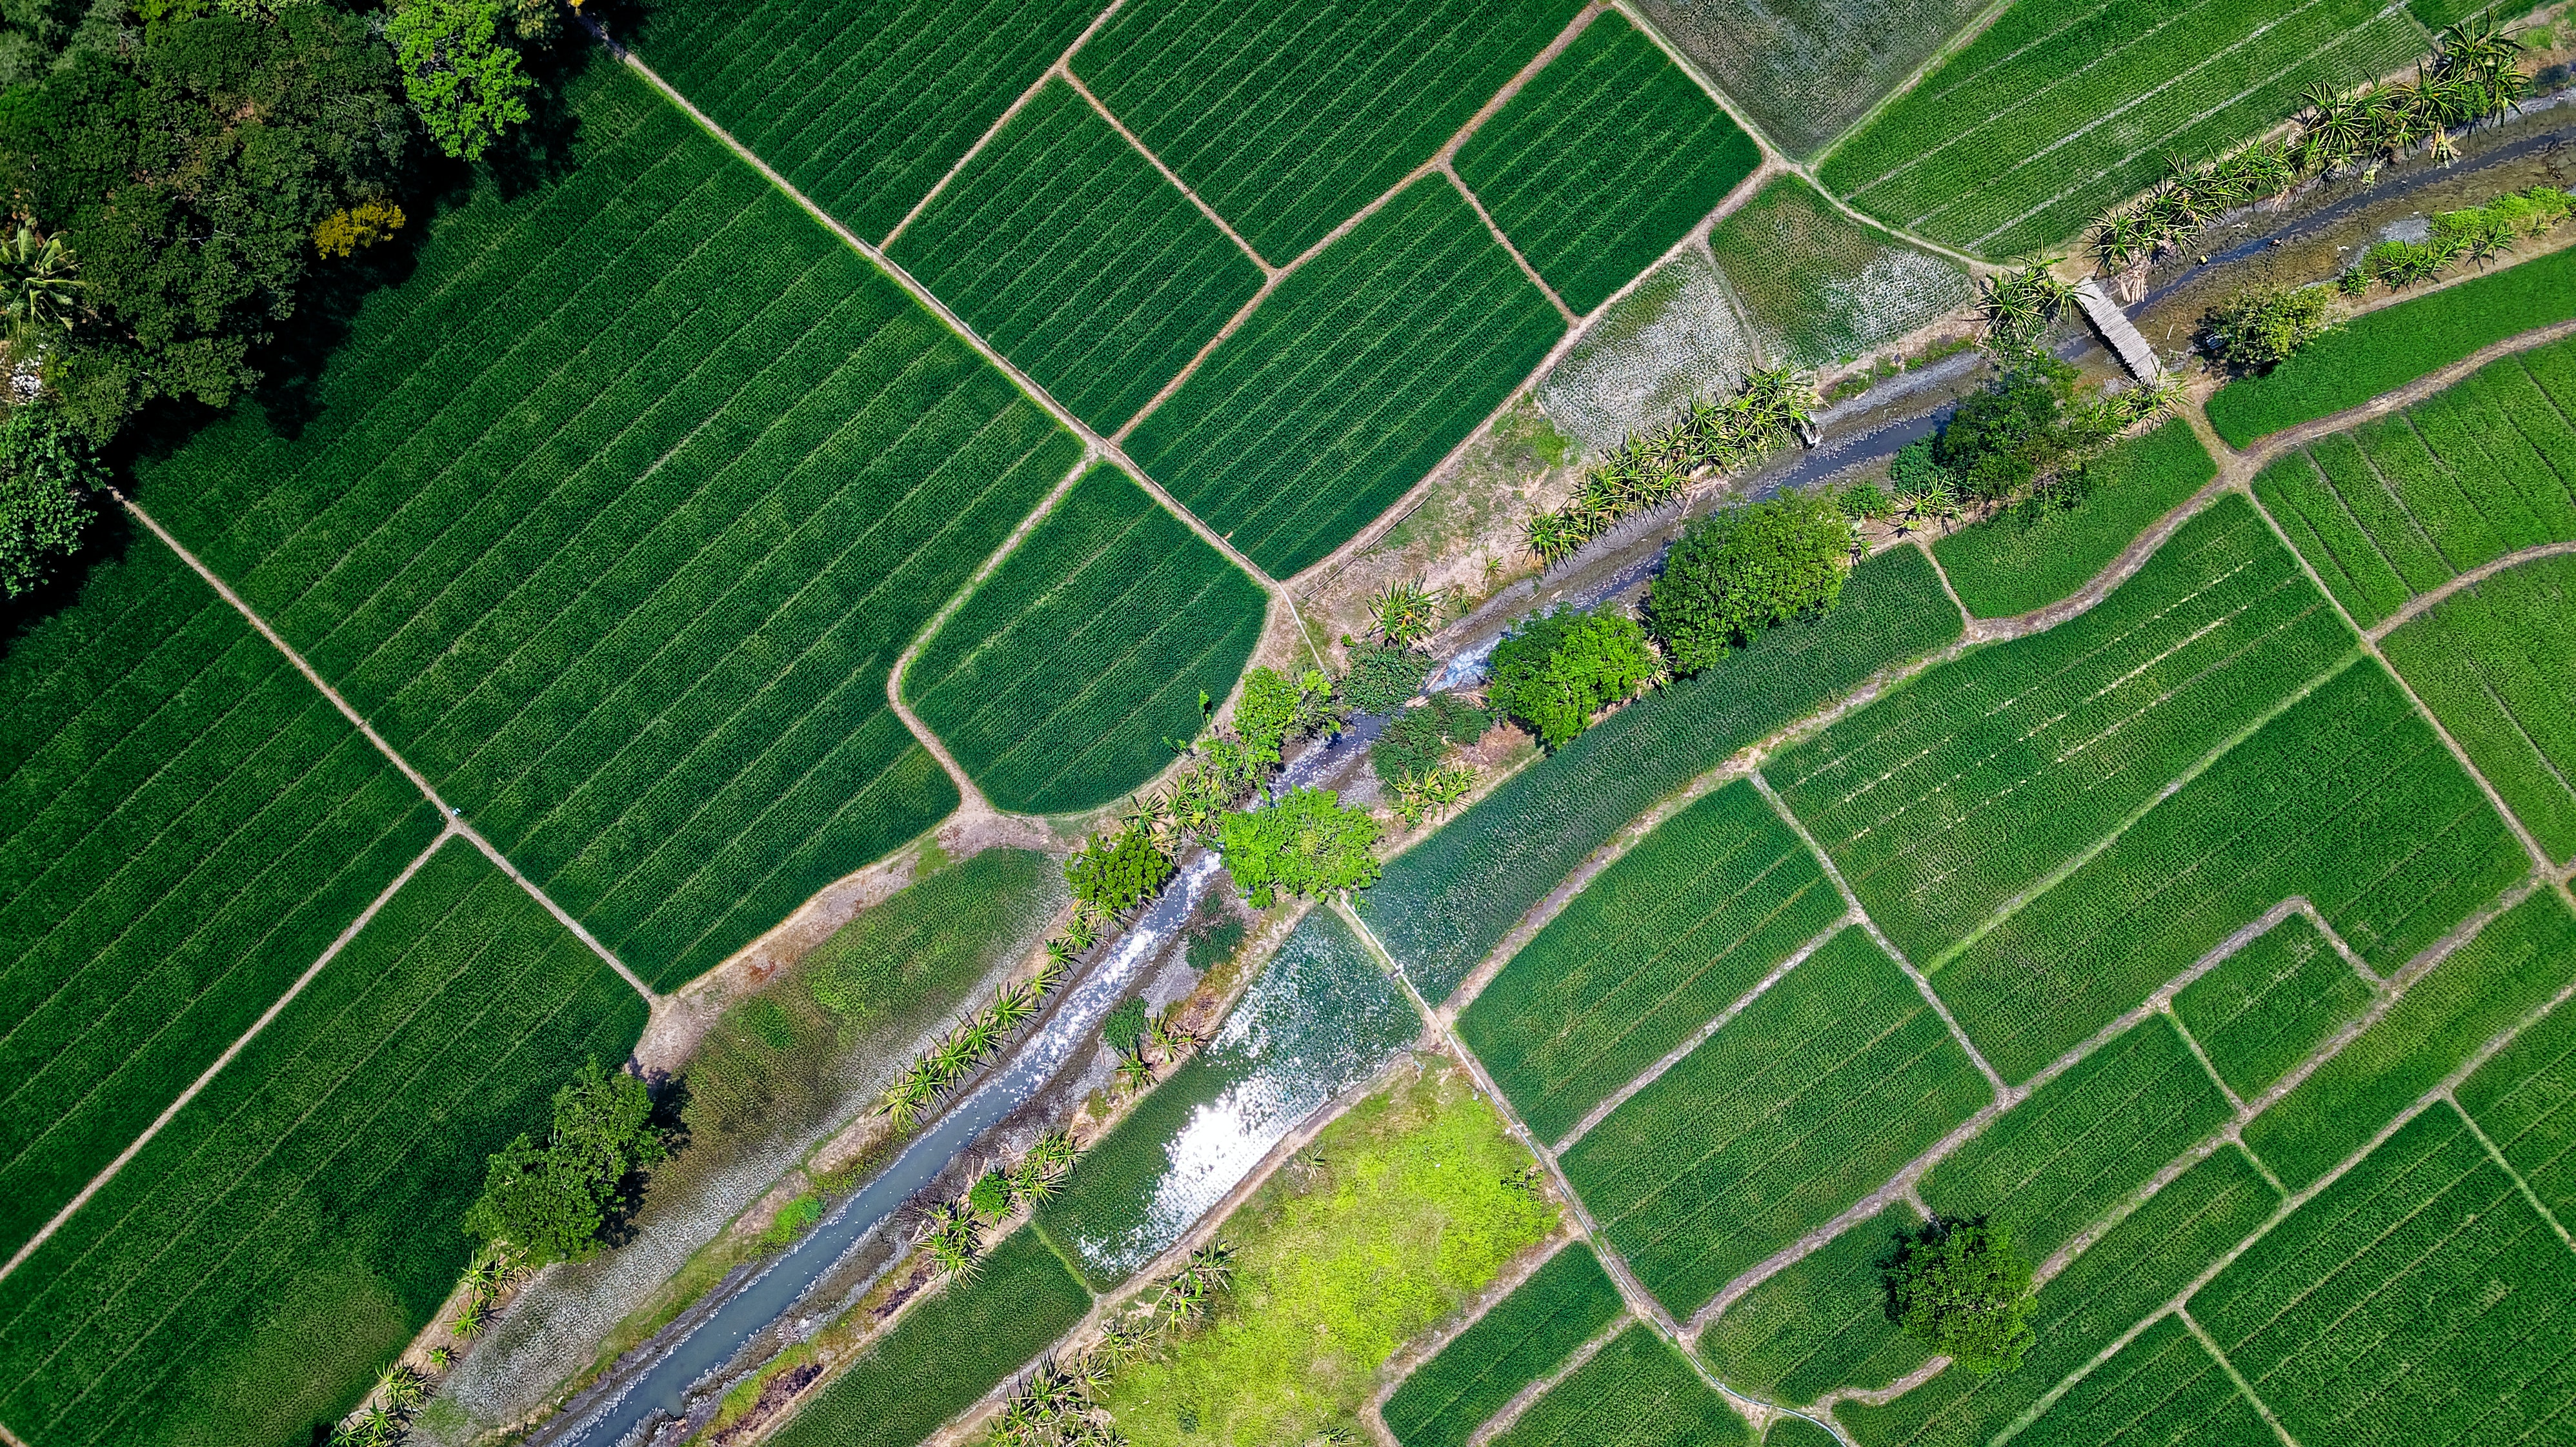

Imagine you're the owner of a cutting-edge consultancy company specializing in precision agriculture. Your expertise lies in providing data-driven recommendations to thousands of farmers who have embraced precision-oriented farming methods. These farmers understand that the key to optimizing their crop yields lies in harnessing the power of data.

As the leader of your consultancy, you recognize the critical role played by key factors such as N (nitrogen), P (phosphorus), K (potassium), rainfall, humidity, temperature, and pH. These variables serve as the foundation for your tailored crop recommendations, enabling farmers to make informed decisions for their precision agricultural farms.

With a vast repository of data at your disposal, you're on a mission to revolutionize the industry by providing accurate and insightful crop suggestions. Your consultancy leverages advanced data science techniques to analyze the specific requirements of each farm, considering factors like nutrient levels, climate conditions, and soil characteristics.


================================================================================================================================
**Disclaimer**:

We use the Crop Recommendation dataset available on [kaggle.com](https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset), built as result of performing data augmentation on datasets of rainfall, climate, and fertilizer data available for India.

================================================================================================================================

### what is the objective of the machine learning model?

We aim to find a model with high classification accuracy. Such that when given the profile of an agricultural farm based on the following data:
* N - ratio of nitrogen content in soil
* P - ratio of phosphorus content in soil
* K - ratio of potassium content in soil
* temperature - temperature in degress celcius
* humidity - relative humidity in %
* pH - pH value of soil
* rainfall - rainfall in mm

We are able to recommend the best crop to be planted from the following 21 different crops:
* Apple
* Banana
* Blackgram
* Chickpea
* Coconut
* Coffee
* Cotton
* Grapes
* Jute
* Kidneybeans
* Lentil
* Maize
* Mango
* Mothbeans
* Mungbean
* Orange
* Papaya
* Pigeonpeas
* Pomegranate
* Rice
* Watermelon

### 1. Load in data 

In [1]:
#import modules to handle datasets
import pandas as pd
import numpy as np

In [2]:
#load dataset
df = pd.read_csv('Crop_recommendation.csv')

#check number of rows and columns in the dataset
print("shape of dataset: ", df.shape)

shape of dataset:  (2200, 8)


the overall dataset contains 2200 rows, that is the number of observations from unique farms, and 8 columns, that is 7 columns are predictive variables and the the last 'label' is tthe target variable. Below is the first 10 rows:

In [3]:
#see top of datasets:
df.head(10)

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice
5  69  37  42    23.058049  83.370118  7.073454  251.055000  rice
6  69  55  38    22.708838  82.639414  5.700806  271.324860  rice
7  94  53  40    20.277744  82.894086  5.718627  241.974195  rice
8  89  54  38    24.515881  83.535216  6.685346  230.446236  rice
9  68  58  38    23.223974  83.033227  6.336254  221.209196  rice

### 2. Analyze Dataset

In [4]:
#import modules to handle visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
#to check if there the data types and if there are null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


The dataset has no missiing values. Apart from the target variable, 'label', all of the columns contain numerical values. The target variable contains text strings.

In [6]:
#to check if there are any duplicates:
df.duplicated().any()

False

There are no duplicate entries in the dataset.

array([[<AxesSubplot: title={'center': 'N'}>,
        <AxesSubplot: title={'center': 'P'}>,
        <AxesSubplot: title={'center': 'K'}>],
       [<AxesSubplot: title={'center': 'temperature'}>,
        <AxesSubplot: title={'center': 'humidity'}>,
        <AxesSubplot: title={'center': 'ph'}>],
       [<AxesSubplot: title={'center': 'rainfall'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

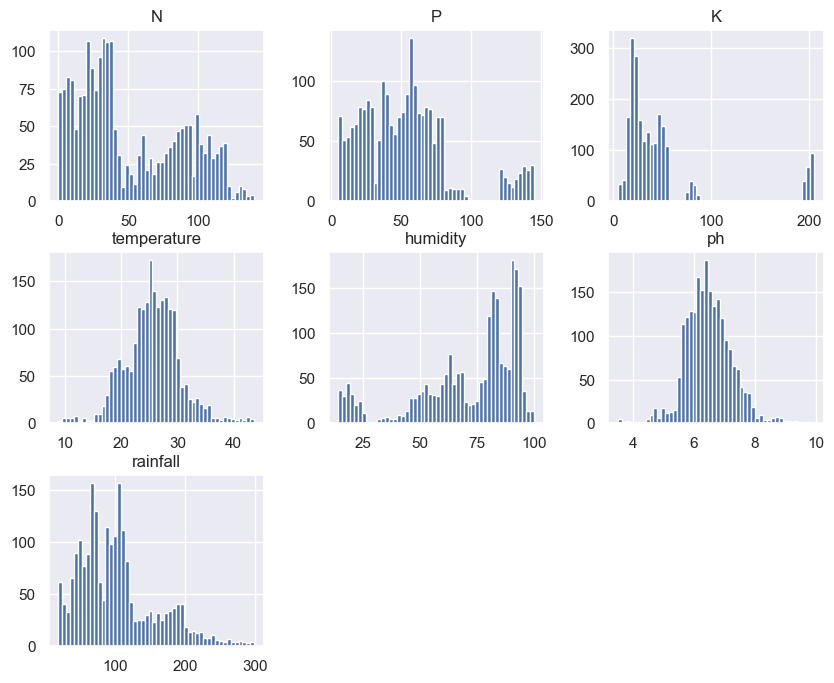

In [7]:
#plot histogram for all numerical variables in the dataset; the target variable is not included:

sns.set()
df.hist(bins = 50, figsize = (10,8))

We find out that the 'rainfall' and 'ph' variables roughly resembles a normal distribution. The other variables don't. As a step in finetuning our model, we could come back here to perform some feature transformation on these variables. 

<AxesSubplot: >

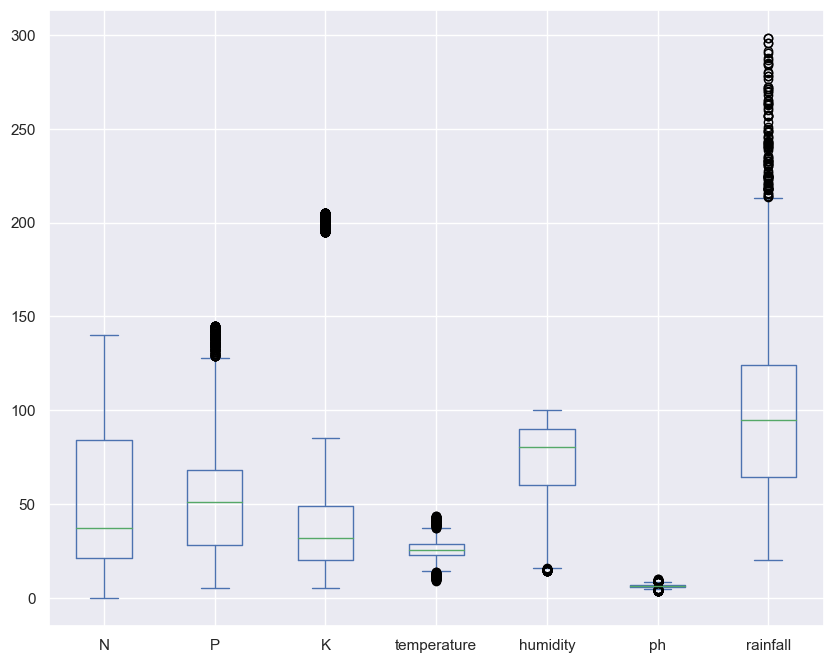

In [8]:
#plotting a combined boxplot for all numerical variables; the target variable is not included:

df.plot(kind = 'box', figsize = (10,8))

We find out that the 'rainfall', 'temperature', 'K', and 'P' variables all have outliers. As a later step, we would figure out if this significantly affects the accuracy of our model.

#### Now to analyze the target variable 

In [9]:
#to confirm the total number of categories in the target variable:
df['label'].nunique()

22

In [10]:
#so to figure out for the target variable, if it has any skewed categories:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

Indeed, there are 22 different crops in the dataset. And there are 100 unique observations for each type of crop.

### 3. Prepare Data For Model 

In [11]:
#now we want to split the dataset into train and test set using the stratified-shuffle-split method:

from sklearn.model_selection import StratifiedShuffleSplit

strat = StratifiedShuffleSplit(n_splits = 1, random_state = 42 , test_size= 0.1)

for train_id, test_id in strat.split(df, df['label']):
    train = df.iloc[train_id]
    test = df.iloc[test_id]

The reason we use this method is because we don't just want to randomly split the dataset into train and test set using a ratio of 0.1. We want to make sure that the splitting is done paying attention to the 22 different categories in the target variable. 
That is, for each crop, the ratio of the number of its observation in the train Vs. in the test set is 9:1. This is to avoid sampling bias. 

In [12]:
#on the train set, to confirm that the stratified-shuffle splitting was done accurately done:
train['label'].value_counts()

banana         90
chickpea       90
mungbean       90
coconut        90
papaya         90
blackgram      90
pomegranate    90
pigeonpeas     90
jute           90
maize          90
mothbeans      90
kidneybeans    90
mango          90
muskmelon      90
grapes         90
coffee         90
lentil         90
rice           90
apple          90
cotton         90
orange         90
watermelon     90
Name: label, dtype: int64

In [13]:
#on the test set, to confirm that the stratified-shuffle splitting was done accurately done  :
test['label'].value_counts()

cotton         10
pigeonpeas     10
mango          10
mothbeans      10
mungbean       10
jute           10
papaya         10
pomegranate    10
maize          10
apple          10
rice           10
watermelon     10
orange         10
lentil         10
grapes         10
chickpea       10
banana         10
coconut        10
kidneybeans    10
blackgram      10
coffee         10
muskmelon      10
Name: label, dtype: int64

In [14]:
#for the train set, we save and then remove both the 'target' and 'label' variables:

y_train = train['label'].copy()

train = train.drop('label', axis = 1)

In [15]:
#a preview of the modified train set:
train.head()

N   P   K  temperature   humidity        ph    rainfall
1099  117  81  53    29.507046  78.205856  5.507642   98.125658
292    39  76  76    19.968375  15.573244  8.135901   69.157591
1604   20   7   9    29.477417  91.578029  7.129137  111.172750
1990  102  45  16    23.656300  77.524260  7.294219   74.898499
289    22  60  85    18.839291  14.740719  7.811998   94.781896

In [16]:
#for the test set, we save and then remove both the 'target' and 'label' variables:

y_test = test['label'].copy()

test = test.drop('label',axis =1)

In [17]:
#a preview of modified test set:
test.head()

N   P   K  temperature   humidity        ph    rainfall
1918  123  39  24    25.007551  78.179521  7.453106   86.064119
497    20  60  22    29.650529  42.898332  6.876573  186.922605
2111   85  33  25    26.208114  52.509880  6.910824  189.094482
789    60  59  22    31.868473  66.742175  7.191523   74.222386
332    40  73  20    21.593430  20.318712  5.811314   61.138720

In [18]:
#We import and instantiate module needed to perform  Min-Max Scaling on both datasets:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()

In [19]:
#We perform Min-Max Scaling on the train set:
train_scaled = min_max.fit_transform(train)

#We perform Min-Max scaling on the test set:
test_scaled = min_max.transform(test)

In [20]:
#a preview of scaled train set:
train_scaled[:5,:]

array([[0.83571429, 0.54285714, 0.24      , 0.59344273, 0.74597474,
        0.31147497, 0.27991634],
       [0.27857143, 0.50714286, 0.355     , 0.31973481, 0.01534234,
        0.72020291, 0.17584525],
       [0.14285714, 0.01428571, 0.02      , 0.59259253, 0.90196604,
        0.56363824, 0.3267895 ],
       [0.72857143, 0.28571429, 0.055     , 0.42555817, 0.73802367,
        0.58931066, 0.19647012],
       [0.15714286, 0.39285714, 0.4       , 0.28733625, 0.00563062,
        0.66983188, 0.26790349]])

Scaling, which makes the variables that have the same scale of values,  is important for a machine learning model, as it helps it quickly get to the global minimum of the model, get to the best possible values. 

### 4. Feed Data into Model

In [21]:
#first we try a very simple model, Logistic Regression:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [22]:
#we fit the scaled train set to the logistic Regression model:
log_reg.fit(train_scaled,y_train)

LogisticRegression()

In [23]:
#We compare the predictions vs Actual results for the 1st 5 training examples:
pred_few = log_reg.predict(train_scaled[:5,:])


print('Predictions for 1st 5 train examples:')
print(pd.Series(pred_few, index = y_train.head().index))

print()
print('Actual labels for 1st 5 train examples:')
print(y_train.head())

Predictions for 1st 5 train examples:
1099      banana
292     chickpea
1604      orange
1990      cotton
289     chickpea
dtype: object

Actual labels for 1st 5 train examples:
1099      banana
292     chickpea
1604      orange
1990      cotton
289     chickpea
Name: label, dtype: object


In [24]:
#We compute the accuracy of this logistic regression model using a cross validation of 5 folds:
from sklearn.model_selection import cross_val_score

scores_log_reg = cross_val_score(log_reg, train_scaled, y_train, scoring = 'accuracy')


print('Score of five folds: ', scores_log_reg)
print('Mean score for Logistic Regression: ', np.mean(scores_log_reg) )

Score of five folds:  [0.93686869 0.93181818 0.92171717 0.9520202  0.95707071]
Mean score for Logistic Regression:  0.9398989898989898


This is a very good accuracy score, considering we are using a simple model, this suggests that the dataset is quite easy. But we try a more complex model on the dataset. 

#### Trying a SVM classifier on the train set

In [25]:
#We fit the scaled dataset to a Support Vector Machine classifier:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(train_scaled,y_train)

SVC()

In [26]:
#We compute the accuracy of this svm model:
scores_svm_clf = cross_val_score(svm_clf, train_scaled, y_train, scoring = 'accuracy')

print('Score of five folds for SVM classifer: ',scores_svm_clf)
print('Mean score for SVM classifier: ', np.mean(scores_svm_clf))

Score of five folds for SVM classifer:  [0.98484848 0.97474747 0.98737374 0.97727273 0.98989899]
Mean score for SVM classifier:  0.9828282828282827


With a mean score of approximately 98% accuracy, a SVM Classifier performed better on the dataset. So before we further test the performance of one more model on the dataset, we try to see the specific examples that the model has misclassified.

In [27]:
#We see the examples that it misclassified:
y_pred_svm = svm_clf.predict(train_scaled)

mis_classified = train[y_pred_svm != y_train]


combined = mis_classified.join(y_train)

combined['misclassified as'] = pd.Series(y_pred_svm, index = y_train.index)[combined.index]

print('The total number of misclassified training examples are: ', len(combined))

print('Below are the misclassified training examples:')
display(combined)



The total number of misclassified training examples are:  30
Below are the misclassified training examples:


N   P   K  temperature   humidity        ph    rainfall       label  \
802  38  60  20    29.848231  60.638726  7.491217   46.804526      lentil   
588   9  59  25    30.393213  60.162995  7.699201   35.374932   mothbeans   
438  14  74  19    18.397591  36.826393  6.624966   93.123306  pigeonpeas   
73   78  43  42    21.323763  83.003205  7.283737  192.319754        rice   
65   99  41  36    24.458021  82.748356  6.738652  182.561632        rice   
818  22  67  22    29.030176  64.491666  7.475927   54.939377      lentil   
571   2  56  23    26.653330  59.790234  7.550091   36.918526   mothbeans   
45   91  35  38    24.897282  80.525861  6.134287  183.679321        rice   
17   91  35  39    23.793920  80.418180  6.970860  206.261186        rice   
98   78  35  44    26.543481  84.673536  7.072656  183.622266        rice   
14   94  50  37    25.665852  80.663850  6.948020  209.586971        rice   
52   93  56  42    23.857240  82.225730  7.382763  195.094831        rice   
78   77  36  37    26.884449  81.460337  6.136132  194.576656        rice   
13   93  56  36    24.014976  82.056872  6.984354  185.277339        rice   
70   61  52  41    24.976695  83.891805  6.880431  204.800185        rice   
58   71  46  40    20.280194  82.123542  7.236705  191.953574        rice   
20   89  45  36    21.325042  80.474764  6.442475  185.497473        rice   
95   88  46  42    22.683191  83.463583  6.604993  194.265172        rice   
87   84  50  44    25.485920  81.406335  5.935344  182.654936        rice   
746  20  68  23    25.549606  63.954255  7.707332   63.183053   blackgram   
135  98  44  21    25.771751  74.089114  6.524478  107.493192       maize   
482   5  68  20    19.043805  33.106951  6.121667  155.370562  pigeonpeas   
508  25  57  24    27.654722  58.599863  6.974978   36.942550   mothbeans   
81   72  45  35    25.429775  82.946826  5.758506  195.357454        rice   
80   68  57  43    26.088679  80.379799  5.706943  182.904350        rice   
63   70  36  42    21.841069  80.728864  6.946210  202.383832        rice   
724  20  60  25    27.325421  69.090478  6.726469   61.192509   blackgram   
42   83  60  36    25.597049  80.145093  6.903986  200.834898        rice   
35   95  55  42    26.795339  82.148087  5.950661  193.347399        rice   
417   3  68  16    18.319104  34.697766  4.964888  107.472161  pigeonpeas   

    misclassified as  
802        blackgram  
588           lentil  
438      kidneybeans  
73              jute  
65              jute  
818        blackgram  
571           lentil  
45              jute  
17              jute  
98              jute  
14              jute  
52              jute  
78              jute  
13              jute  
70              jute  
58              jute  
20              jute  
95              jute  
87              jute  
746           lentil  
135           cotton  
482      kidneybeans  
508           lentil  
81              jute  
80              jute  
63              jute  
724           lentil  
42              jute  
35              jute  
417      kidneybeans

The majority of examples this svm model classified are from the 'rice' category; it misclassified as belonging to 'jute' category.  
So we try one more model on the dataset: Random Forest Classifier. 

#### Trying Random Forest Classifier on the train set 

In [28]:
#We fit the train set to a Random Forest classifier of 10 estimators:

from sklearn.ensemble import RandomForestClassifier

rand_class = RandomForestClassifier(n_estimators = 10, random_state = 42)
rand_class.fit(train_scaled, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [29]:
#we compute the accuracy of the random forest classifier:
scores_rand_class = cross_val_score(rand_class, train_scaled, y_train, scoring  = 'accuracy')

print('Scores for Random Forest classifier: ', scores_rand_class)
print('Mean score for Random Forest classifier: ', np.mean(scores_rand_class))


Scores for Random Forest classifier:  [0.99494949 0.98484848 1.         0.99747475 0.99494949]
Mean score for Random Forest classifier:  0.9944444444444445


The RandomForestClassifier has done remarkably well, with an accuracy score of 99%. But for sake of finetuning or improvement, let's also see the training examples it got wrong.

In [30]:
#We observed the training examples that the Random Forest misclassified:
y_pred_rand_forest = rand_class.predict(train_scaled)

mis_classified_rand_forest = train.loc[y_pred_rand_forest != y_train]

combined_rand_for = mis_classified_rand_forest.join(y_train) 

combined_rand_for['misclassified as'] = pd.Series(y_pred_rand_forest, index = y_train.index)[combined_rand_for.index]

print('The total number of misclassified example by Random Forest Classifier: ', len(combined_rand_for))
print('Below are the misclassified training examples: ')
display(combined_rand_for)




The total number of misclassified example by Random Forest Classifier:  1
Below are the misclassified training examples: 


N   P   K  temperature   humidity        ph    rainfall label  \
78  77  36  37    26.884449  81.460337  6.136132  194.576656  rice   

   misclassified as  
78             jute

We see that it got just 1 training examples wrong. This is beyond impressive! Below is a visualization of the performance of the 3 models we have tried out so far. So we save this model. 

In [31]:
#We save this random forest classifier model:
import joblib

joblib.dump(rand_class, 'rand_class.pkl')


['rand_class.pkl']

In [32]:
joblib.load('rand_class.pkl')

RandomForestClassifier(n_estimators=10, random_state=42)

### 5. Evaluate Best Model's Performance on Test Set 

So far, the Random Forest Classsifer has been the best model. Thus, we can now test it on the scaled test set. 

In [33]:
#We make the random forest predict on the test set:
y_pred_test = rand_class.predict(test_scaled)

#this is a preview of its first 5 predictions:
y_pred_test[:5]

array(['cotton', 'pigeonpeas', 'coffee', 'maize', 'kidneybeans'],
      dtype=object)

In [34]:
#We now compute the accuracy of this prediction and compare it the train score:
score_test = (y_pred_test == y_test).sum()/len(y_test)

print("Train Score (Random Forest): ", np.mean(scores_rand_class))
print('Test Score (Random Forest): ', score_test)

Train Score (Random Forest):  0.9944444444444445
Test Score (Random Forest):  0.9954545454545455


With a train score and a test score value that are similar to each other, this random forest model is accurate 99% of the time. We are good to go!  

### 6. Model Compilation

In [38]:
#We create a data pipeline for the whole process of getting a prediction:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([('scaling', MinMaxScaler()), ('model', RandomForestClassifier(random_state = 42, n_estimators = 10))])

#we fit the train set into pipeline:
pipeline.fit(train,y_train)

Pipeline(steps=[('scaling', MinMaxScaler()),
                ('model',
                 RandomForestClassifier(n_estimators=10, random_state=42))])

In [45]:
#Finally, we now have a data pipeline that we can make predictions on:
some_data = np.array([[88, 50, 53, 23, 71.6, 7.5, 160.5]])
pipeline.predict(some_data)


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array(['jute'], dtype=object)

### Conclusion 

So that's it for the crop recommendation system. A suggested next step will be to deploy the system to a website, where we can anyone can easily input their data and get recommendations. Thanks!